<a href="https://colab.research.google.com/github/massimocipressi/MLPNS_MCipressi/blob/main/vis/scattercontours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Designed by Federica Bianco:

visualization homework

improving plots

2019 version: DSPS UDel 

In [ ]:
import pylab as pl
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pandas as pd
# you will use astropy to make the contours-scatter plot
from astropy import constants as const
from astropy import units as u
#pylab.style.use("https://raw.githubusercontent.com/fedhere/DSPS_2019/master/fbb.mplstyle")

In [ ]:

 

pl.rcParams['axes.facecolor'] = "F1F1F1"
pl.rcParams['figure.facecolor'] = "F1F1F1"
pl.rcParams['figure.edgecolor'] = "F1F1F1"
pl.rcParams['savefig.facecolor'] = "F1F1F1"
pl.rcParams['savefig.edgecolor'] = "F1F1F1"

pl.rcParams['axes.labelcolor'] = 'k'

pl.rcParams['xtick.direction'] = 'in'
pl.rcParams['ytick.direction'] = 'in'
pl.rcParams['xtick.color'] = 'k'
pl.rcParams['ytick.color'] = 'k'
pl.rcParams['axes.axisbelow'] = True
pl.rcParams['grid.linestyle'] = '-'

pl.rcParams['text.color'] = 'k'

pl.rcParams['font.size'] = 20

pl.rcParams['xtick.labelsize'] = "large"
pl.rcParams['ytick.labelsize'] = "large"
pl.rcParams['lines.solid_capstyle'] = "round"
pl.rcParams['patch.edgecolor'] = "w"
pl.rcParams['patch.force_edgecolor'] = True

#colore
pl.rcParams['image.cmap'] = "viridis"
pl.rcParams['image.interpolation'] = 'nearest'

pl.rcParams['xtick.top'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['axes.grid'] = False


# high density to contours examples

## get data on  star data from kepler2 mission

In [ ]:

url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI"
url +="?table=k2targets&select=epic_number,k2_teff,k2_rad"
url +="&format=CSV"



In [ ]:
df = pd.read_csv(url)
df.head()

,epic_number,k2_teff,k2_rad
0,60018365,NaN,NaN
1,60018369,NaN,NaN
2,60018371,NaN,NaN
3,60018372,NaN,NaN
4,60018374,NaN,NaN


In [ ]:
## Add a column for the star luminosity in Watts
# follow [this description](http://personal.psu.edu/mxe17/A010/lectures/lect19.html) Section 2


The luminosity of the star is $4 ~ \pi ~ r^2 ~\sigma~ T^4$
with $\sigma$ Boltzmann constand, $T$ temperature, $r$ radius of the star. 

Note that the radius is given in sun radii, use ```const.R_sun``` to get the radius in natural units instead.

In [ ]:
df['k2_L'] = 4 * np.pi * (df['k2_rad'] * const.R_sun)**2 * \
            const.sigma_sb * df['k2_teff']**4 
#Adding a column for luminosity in (Watts)

In [ ]:
df.shape

(392245, 4)

In [ ]:
df.shape[0] - df.isna().sum(axis=0)["k2_teff"]

236850

## Plot the HR diagram:

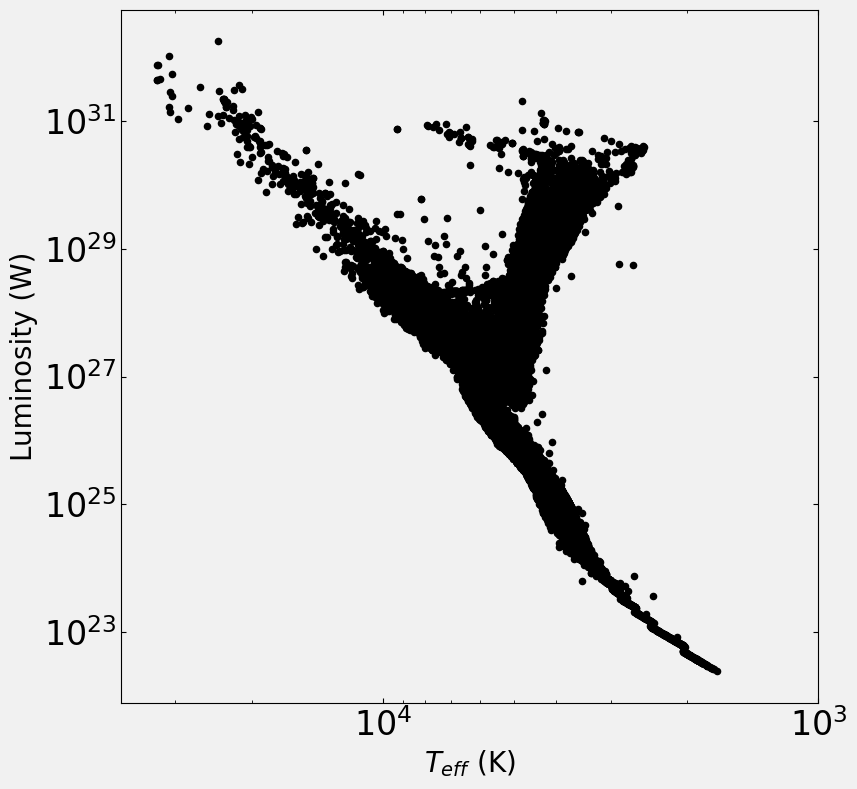

In [ ]:

df.plot.scatter(x='k2_teff',y='k2_L', loglog=True, color='k', s=20, figsize=(9,9))
plt.xlim(40000,1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)');


## Plot the HR diagram using transparency to better the readability of the plot:

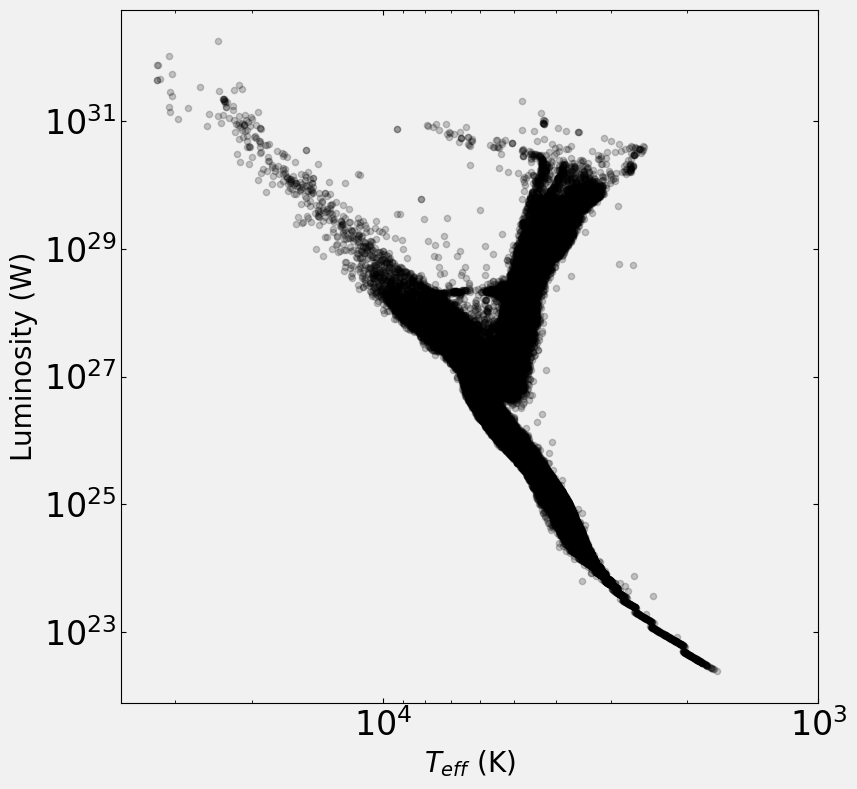

In [ ]:

df.plot.scatter(x='k2_teff',y='k2_L', loglog=True, color='k', s=20, figsize=(9,9), alpha=0.2)
plt.xlim(40000, 1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)');


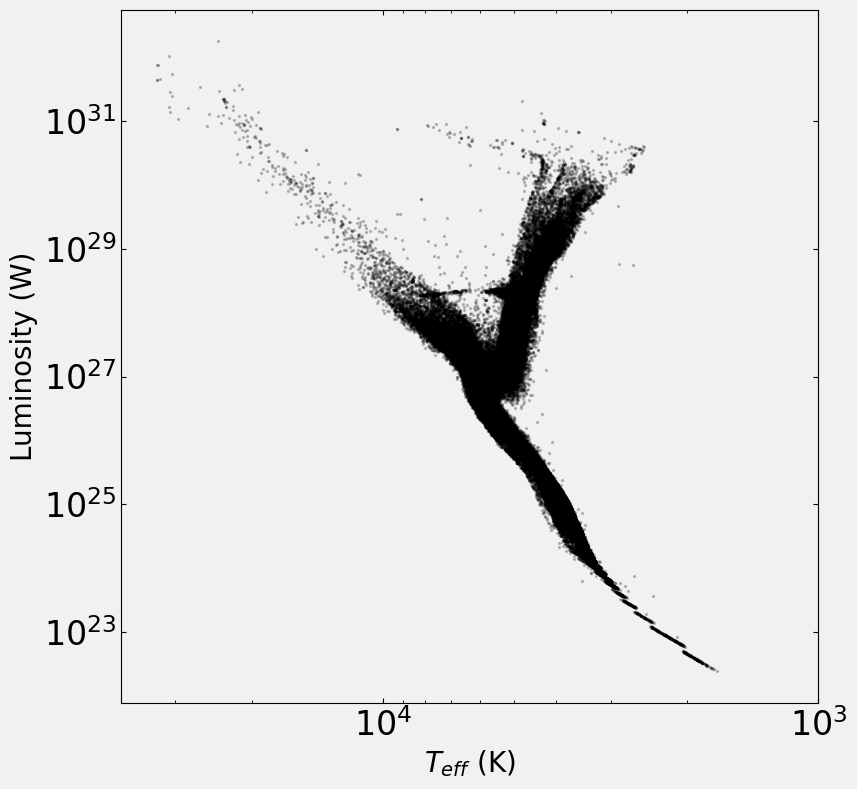

In [ ]:

df.plot.scatter(x='k2_teff',y='k2_L', loglog=True, color='k', s=2, figsize=(9,9), alpha=0.2)
plt.xlim(40000, 1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)');

In [ ]:

#dropna so you can use the astropy module
teff_na = df['k2_teff'].dropna()
L_na = df['k2_L'].dropna()

## AstroML version

In [ ]:
!pip install astroML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
plotting.scatter_contour?

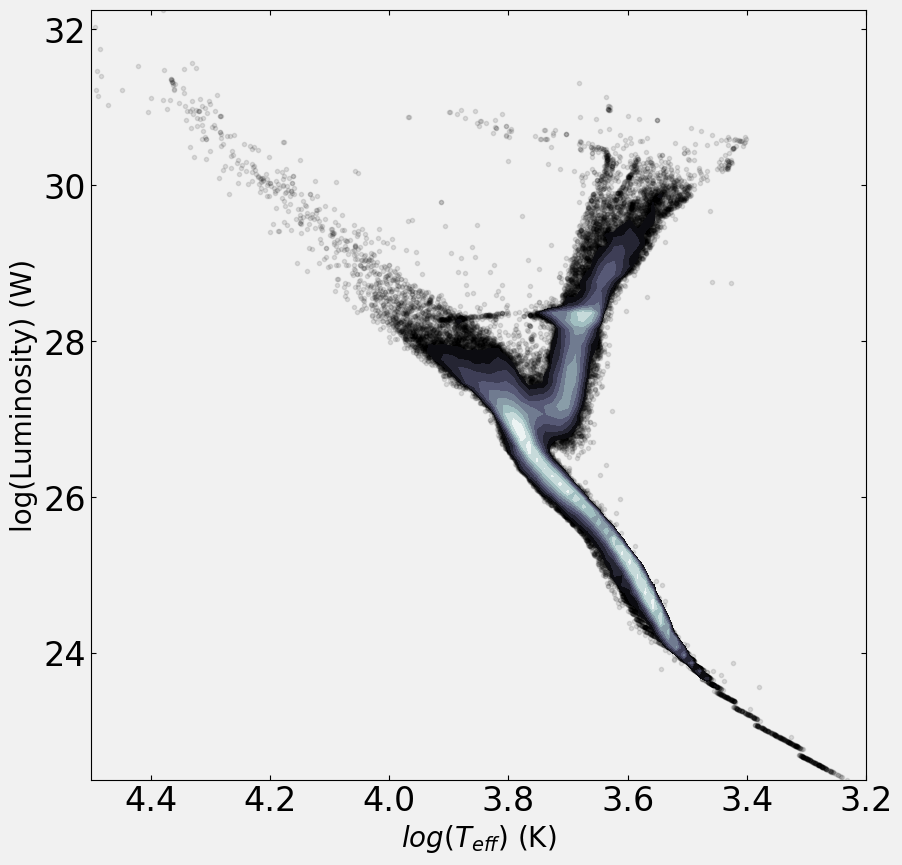

In [ ]:

from astroML import plotting
#rememnber that you are making a log-log plot
ax = plt.figure(figsize=(10,10)).add_subplot()
plotting.scatter_contour(np.log10(teff_na), np.log10(L_na), 
                         threshold=50, log_counts=True,
                         histogram2d_args=dict(bins=(100,100)), filled_contour=True,
                         plot_args=dict(marker='.', linestyle='none', color='black', alpha=0.1),
                         contour_args=dict(alpha=1, cmap='bone'))
pl.ylabel('log(Luminosity) (W)')
pl.xlabel(r'$log(T_{eff})$ (K)')
pl.xlim(4.5, 3.2)
pl.savefig("k2scatter_contour.png")

# by-hand version

Here is how you would do this by hand.

In [ ]:
H, xbins, ybins = np.histogram2d(np.log10(teff_na), np.log10(L_na), bins=(40, 40))
Hsort = np.sort(H.flatten())

<ipython-input-54-3bdd64f0eb4b>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = np.hstack([np.log10(teff_na)[:, None], np.log10(L_na)[:, None]])
<ipython-input-54-3bdd64f0eb4b>:29: UserWarning: linewidths is ignored by contourf
  axc = contourf(H.T, extent=extent, levels=levels,


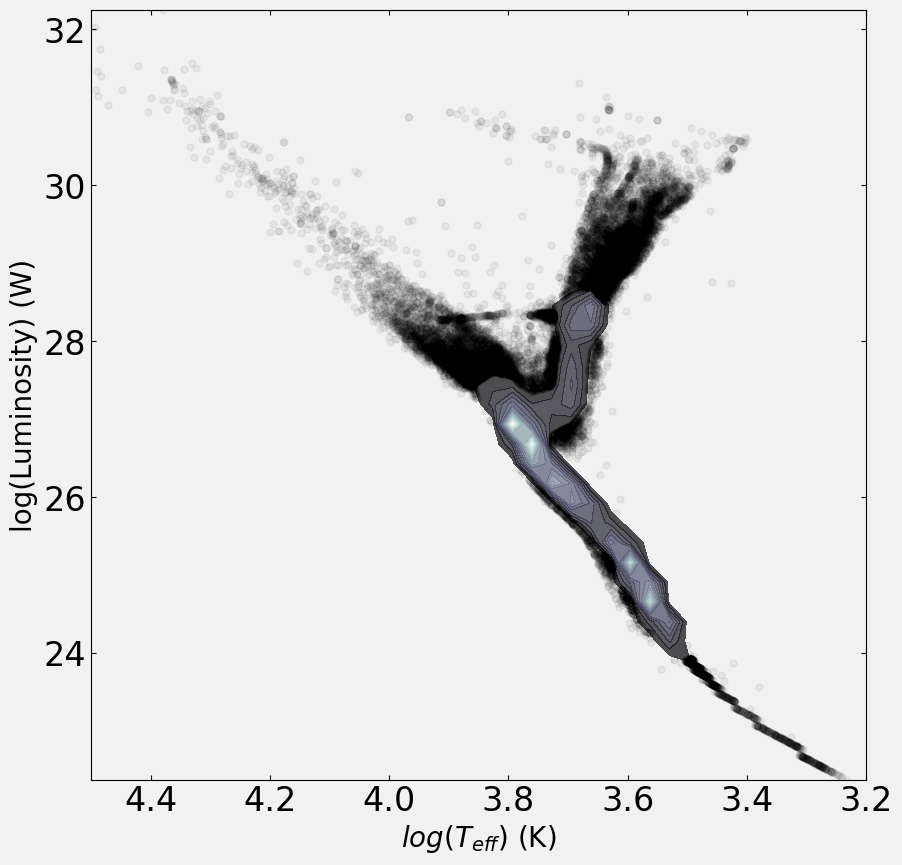

In [ ]:
extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
ax = pl.figure(figsize=(10,10)).add_subplot(111)
levels = np.linspace(H.max()/15, H.max(), 15)
i_min = np.argmin(levels)
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)

#contours = ax.contourf(H.T, levels, extent=extent, cmap='bone')
X = np.hstack([np.log10(teff_na)[:, None], np.log10(L_na)[:, None]])

if len(outline.allsegs[0]) > 0:
    outer_poly = outline.allsegs[0][0]
    try:
        # this works in newer matplotlib versions
        from matplotlib.path import Path
        points_inside = Path(outer_poly).contains_points(X)
    except:
        # this works in older matplotlib versions
        import matplotlib.nxutils as nx
        points_inside = nx.points_inside_poly(X, outer_poly)

    Xplot = X[~points_inside]
else:
    Xplot = X

points = ax.plot(Xplot[:, 0], Xplot[:, 1], '.', ms=10, alpha=0.05, c='k')
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)
axc = contourf(H.T, extent=extent, levels=levels, 
               linewidths=3, cmap='bone', alpha=0.7)

plt.xlim(4.5,3.2)
plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)');